# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori


# Upload Dataset 

In [2]:
final_df = pd.read_csv("C:/Users/Ankita Mall/OneDrive/Desktop/Data Analyst/Instacart Market Basket Analysis/final_instacart_data.csv")

# Prepare Data in Basket Format

In [3]:
# Create basket: Rows = order_id, Columns = product_name
# Keep only products ordered more than 100 times (you can adjust this threshold)
top_products = final_df['product_name'].value_counts()
top_products = top_products[top_products > 100].index

filtered_df = final_df[final_df['product_name'].isin(top_products)]

# Now group and unstack
basket = filtered_df.groupby(['order_id', 'product_name'])['product_id'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)



In [4]:
basket.head()


product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whipped Cream Cheese,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Convert basket to bool to avoid warning(apriori() function that doesn't have boolean values )
basket = basket.astype(bool)

# Get frequent itemsets with min support (try 0.01)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Sort by support
frequent_itemsets.sort_values(by='support', ascending=False).head(10)


,support,itemsets
6,0.204951,(Banana)
5,0.166782,(Bag of Organic Bananas)
71,0.108975,(Organic Strawberries)
37,0.099848,(Organic Baby Spinach)
56,0.088508,(Organic Hass Avocado)
33,0.078689,(Organic Avocado)
93,0.063892,(Strawberries)
28,0.062509,(Large Lemon)
65,0.059328,(Organic Raspberries)
30,0.058083,(Limes)


In [6]:
# Generate rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort by confidence or lift
rules.sort_values(by='confidence', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
21,(Honeycrisp Apple),(Banana),0.036233,0.204951,0.013968,0.385496,1.880920,1.0,0.006542,1.293807,0.485953,0.061473,0.227087,0.226824
30,(Organic Fuji Apple),(Banana),0.038446,0.204951,0.013968,0.363309,1.772665,1.0,0.006088,1.248721,0.453305,0.060880,0.199181,0.215730
19,(Cucumber Kirby),(Banana),0.038860,0.204951,0.012585,0.323843,1.580102,1.0,0.004620,1.175836,0.381973,0.054426,0.149541,0.192623
11,(Organic Raspberries),(Bag of Organic Bananas),0.059328,0.166782,0.018116,0.305361,1.830902,1.0,0.008222,1.199499,0.482443,0.087101,0.166318,0.206992
7,(Organic Hass Avocado),(Bag of Organic Bananas),0.088508,0.166782,0.026137,0.295312,1.770651,1.0,0.011376,1.182394,0.477498,0.114062,0.154258,0.226014
37,(Strawberries),(Banana),0.063892,0.204951,0.018393,0.287879,1.404623,1.0,0.005298,1.116452,0.307726,0.073440,0.104305,0.188811
9,(Organic Lemon),(Bag of Organic Bananas),0.038031,0.166782,0.010925,0.287273,1.722445,1.0,0.004582,1.169056,0.436012,0.056348,0.144609,0.176389
1,(Apple Honeycrisp Organic),(Bag of Organic Bananas),0.037201,0.166782,0.010510,0.282528,1.693996,1.0,0.004306,1.161325,0.425509,0.054325,0.138914,0.172773
26,(Organic Avocado),(Banana),0.078689,0.204951,0.021850,0.277680,1.354862,1.0,0.005723,1.100688,0.284288,0.083465,0.091478,0.192146
34,(Organic Whole Milk),(Banana),0.052966,0.204951,0.013414,0.253264,1.235729,1.0,0.002559,1.064699,0.201430,0.054864,0.060767,0.159358


In [7]:
rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.3)]



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
11,(Organic Raspberries),(Bag of Organic Bananas),0.059328,0.166782,0.018116,0.305361,1.830902,1.0,0.008222,1.199499,0.482443,0.087101,0.166318,0.206992
19,(Cucumber Kirby),(Banana),0.038860,0.204951,0.012585,0.323843,1.580102,1.0,0.004620,1.175836,0.381973,0.054426,0.149541,0.192623
21,(Honeycrisp Apple),(Banana),0.036233,0.204951,0.013968,0.385496,1.880920,1.0,0.006542,1.293807,0.485953,0.061473,0.227087,0.226824
30,(Organic Fuji Apple),(Banana),0.038446,0.204951,0.013968,0.363309,1.772665,1.0,0.006088,1.248721,0.453305,0.060880,0.199181,0.215730


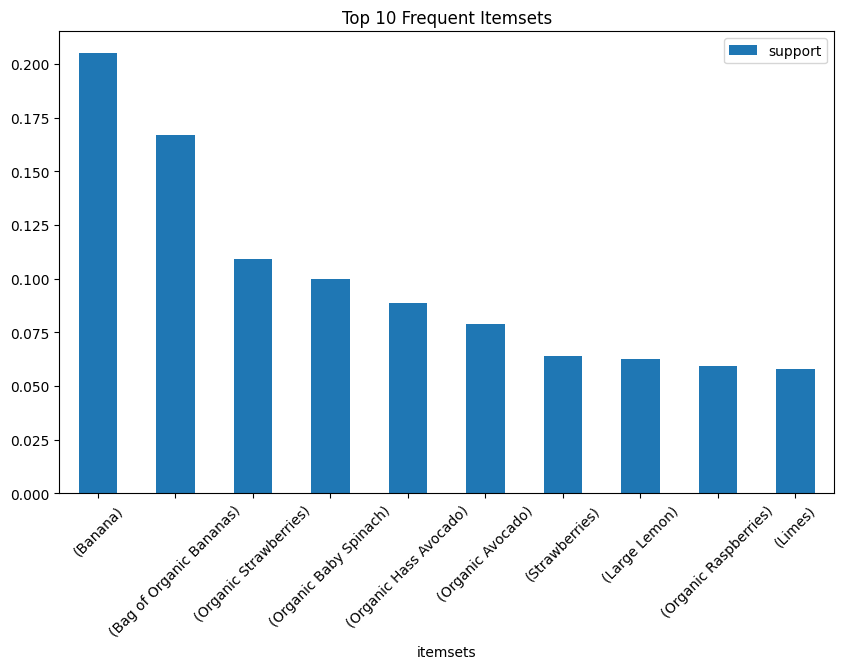

In [8]:
import matplotlib.pyplot as plt

frequent_itemsets.nlargest(10, 'support').plot(kind='bar', x='itemsets', y='support', figsize=(10,6))
plt.title('Top 10 Frequent Itemsets')
plt.xticks(rotation=45)
plt.show()


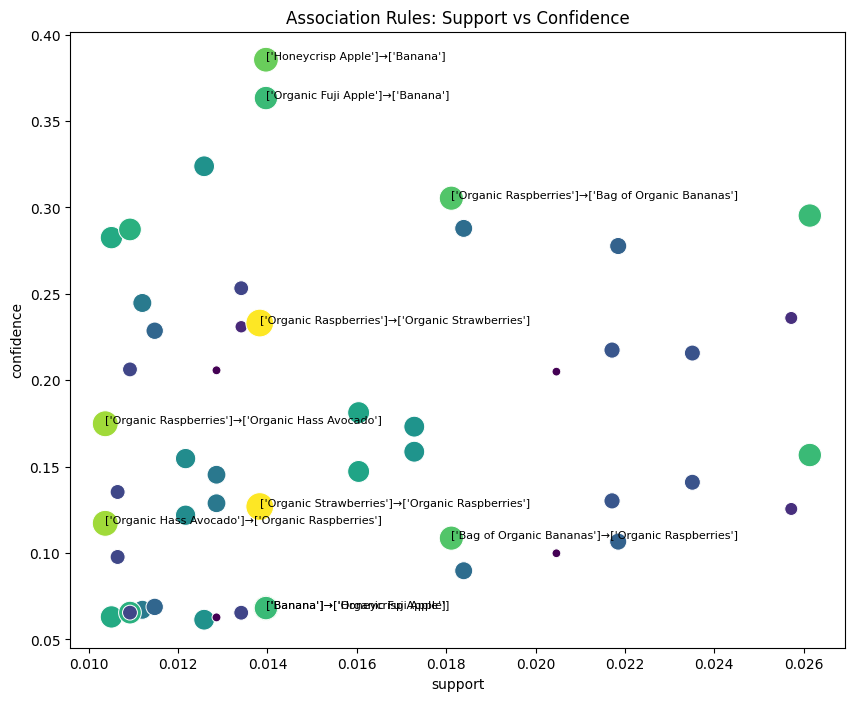

In [9]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(
    data=rules,
    x='support', 
    y='confidence', 
    size='lift',
    hue='lift', 
    palette='viridis',
    sizes=(40, 400),
    legend=False
)

# Annotate top N points (e.g., top 10 by lift)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
for i, row in top_rules.iterrows():
    ax.text(
        row['support'], 
        row['confidence'], 
        f"{list(row['antecedents'])}→{list(row['consequents'])}", 
        fontsize=8
    )

plt.title('Association Rules: Support vs Confidence')
plt.show()


In [10]:
rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
51,(Organic Strawberries),(Organic Raspberries),0.108975,0.059328,0.013829,0.126904,2.139020,1.0,0.007364,1.077398,0.597622,0.089526,0.071838,0.180002
50,(Organic Raspberries),(Organic Strawberries),0.059328,0.108975,0.013829,0.233100,2.139020,1.0,0.007364,1.161853,0.566081,0.089526,0.139306,0.180002
46,(Organic Raspberries),(Organic Hass Avocado),0.059328,0.088508,0.010372,0.174825,1.975251,1.0,0.005121,1.104605,0.524875,0.075453,0.094699,0.146006
47,(Organic Hass Avocado),(Organic Raspberries),0.088508,0.059328,0.010372,0.117188,1.975251,1.0,0.005121,1.065540,0.541678,0.075453,0.061509,0.146006
20,(Banana),(Honeycrisp Apple),0.204951,0.036233,0.013968,0.068151,1.880920,1.0,0.006542,1.034253,0.589077,0.061473,0.033118,0.226824
21,(Honeycrisp Apple),(Banana),0.036233,0.204951,0.013968,0.385496,1.880920,1.0,0.006542,1.293807,0.485953,0.061473,0.227087,0.226824
10,(Bag of Organic Bananas),(Organic Raspberries),0.166782,0.059328,0.018116,0.108624,1.830902,1.0,0.008222,1.055303,0.544661,0.087101,0.052405,0.206992
11,(Organic Raspberries),(Bag of Organic Bananas),0.059328,0.166782,0.018116,0.305361,1.830902,1.0,0.008222,1.199499,0.482443,0.087101,0.166318,0.206992
31,(Banana),(Organic Fuji Apple),0.204951,0.038446,0.013968,0.068151,1.772665,1.0,0.006088,1.031878,0.548240,0.060880,0.030893,0.215730
30,(Organic Fuji Apple),(Banana),0.038446,0.204951,0.013968,0.363309,1.772665,1.0,0.006088,1.248721,0.453305,0.060880,0.199181,0.215730


#### Support (X-axis) → How often the rule occurs in the dataset → Higher = more common.
#### Confidence (Y-axis) → How reliable the rule is when the first item occurs → Higher = more likely.
#### Lift (Bubble size & color) → Strength of the association beyond chance → Bigger/Darker = stronger.

In [11]:
# Step 1: Create readable columns
rules['antecedent_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequent_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Step 2: Select only the clean columns for export
rules_export = rules[['antecedent_str', 'consequent_str', 'support', 'confidence', 'lift']]

# Step 3: Export that
rules_export.to_csv('top_association_rules_clean.csv', index=False)


In [12]:
rules_export.head()

,antecedent_str,consequent_str,support,confidence,lift
0,Bag of Organic Bananas,Apple Honeycrisp Organic,0.010510,0.063018,1.693996
1,Apple Honeycrisp Organic,Bag of Organic Bananas,0.010510,0.282528,1.693996
2,Bag of Organic Bananas,Organic Baby Spinach,0.021712,0.130182,1.303808
3,Organic Baby Spinach,Bag of Organic Bananas,0.021712,0.217452,1.303808
4,Bag of Organic Bananas,Organic Garlic,0.011202,0.067164,1.467263
